In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from sklearn.neighbors import KernelDensity


## Task 1
Use NumPy function to draw random samples from a normal (Gaussian) distribution.
- Create a set of 2000 samples using NumPy function. This data set should be distributed as a Gaussian with mean=0 and standard deviation (std)=0.2
- For the created data set verify the mean and the variance
- Display/plot the histogram of the samples, along with the probability density function using matplotlib.pyplot and np functions

In [2]:
mean = 0.
std = 0.2
samples = np.random.normal(loc=mean, scale=std, size=2000)
mean_calc = np.mean(samples)
std_calc = np.std(samples)
print ("Mean calculated: ", mean_calc, "\nStandard Deviation calculated: ", std_calc)

assert(np.allclose([mean_calc],[mean],atol=0.01))
assert(np.allclose([std_calc],[std_calc],atol=0.01))

Mean calculated:  0.008198329332513016 
Standard Deviation calculated:  0.19999041962952321


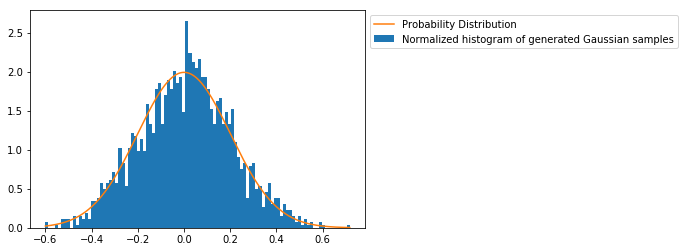

In [3]:
# Histogram of Samples
plt.hist(samples, bins=2000//20, normed= True,label='Normalized histogram of generated Gaussian samples')
plt.plot(np.linspace(min(samples),max(samples),2000),
        plt.mlab.normpdf(np.linspace(min(samples),max(samples),2000),mean, std),
        label="Probability Distribution")
plt.legend(bbox_to_anchor = (1,1))

plt.show()

## Task 2
Two-dimensional kernel density estimate: comparing scikit-learn and scipy

In [24]:
#source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html


data1 = np.random.normal(size=500)
data2 = np.random.normal(scale=0.5 ,size=500)
sample1, sample2 = (data1 + data2),(data1-data2)

xmin = sample1.min()
xmax = sample1.max()
ymin = sample2.min()
ymax = sample2.max()



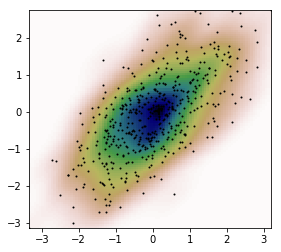

In [32]:
#scipy:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([sample1, sample2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(sample1, sample2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [33]:
#scikitlearn

xy = np.vstack([sample1,sample2])

d = xy.shape[0]
n = xy.shape[1]
bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
#bw = n**(-1./(d+4)) # scott
print('bw: {}'.format(bw))

kde = KernelDensity(bandwidth=bw, metric='euclidean',
                    kernel='gaussian', algorithm='ball_tree')
kde.fit(xy.T)

xmin = sample1.min()
xmax = sample1.max()
ymin = sample2.min()
ymax = sample2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

ax.imshow(np.rot90(Z), cmap=plt.cm.viridis,
          extent=[xmin, xmax, ymin, ymax])

ax.scatter(sample1, sample2, c='k', s=5, edgecolor='')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('scikit-learn')

plt.tight_layout()

plt.savefig('kde.png')
plt.show()

bw: 0.35495366597555705
